In [920]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [921]:
mvi = pd.read_csv('tmdb_5000_movies.csv')
cred = pd.read_csv('tmdb_5000_credits.csv')

In [922]:
mvi.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [923]:
cred.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [924]:
mvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [925]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


# EDA

#### Deciding the importance and if I need the column to further proceeed in my workflow

### Budget

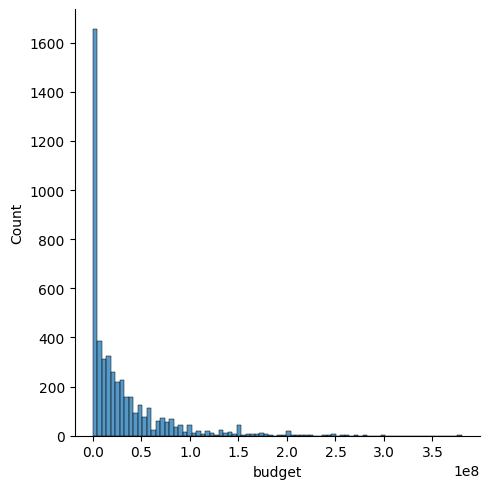

In [926]:
sns.displot(mvi['budget'])
#just fot getting an idea how budget is distributed

#### Using budget as a factor may not account for variations in film quality, creativity, or audience reception, potentially leading to biased recommendations based on production costs.

### Genre
Genre is important because it provides a framework for viewers to anticipate certain themes, styles, and content in a movie. It helps in setting expectations, allowing individuals to choose films aligned with their preferences, mood, or interests, enhancing the overall viewing experience.

### Original Language
Most (93%) of the movies are in english language, hence it would be better not to consider the feature

### production_companies,production_countries
Production companies andcountrieds do not reliably predict a movie's quality or appeal, as factors like creative talent and project specifics can vary widely within the same company.

### release_date
Thsi can be of some importance, as some people like movies of a particular era. But as this project focus on content based filtering, release year will not be of significance

### spoken_languages
A film's language doesn't determine its entertainment value or how well it resonates with viewers from diverse linguistic backgrounds. 

### tagline
tagline can be very condusing and mislead in may cases

## Merging Dataframes

In [927]:
movies = mvi.merge(cred,on = 'title')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [928]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Checking null and duplicate

In [929]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [930]:
movies.dropna(inplace = True)

In [931]:
movies.duplicated().sum()

0

## Preprocessing

In [932]:
import ast

In [933]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

#### Taking only genres

In [934]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


#### Taking only keywords

In [935]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [936]:
def convert_cast(text):
    L = []
    for i in ast.literal_eval(text):
            L.append(i['name'])
    return L[:3]

#### Taking only top 3 actors of the movie

In [937]:
movies['cast'] = movies['cast'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x:x[0:3]) #taking only top 3
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [938]:
movies['cast'][0]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

#### Taking Director's name

In [939]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [940]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [941]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [942]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [943]:
### REMOVING Spaces so that the each tags are unique

In [944]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [945]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [946]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


#### creating tag column by combining  cast,crew, generes, keywords

In [947]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [948]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


### Stemming the words in tags

In [949]:
import nltk
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [950]:
def stemming_helper(tags):
    result = []
    for i in tags:
        result.append(porter_stemmer.stem(i))
    return result

In [951]:
 movies['tags'] = movies['tags'].apply(stemming_helper)

##### converting tags to string

In [952]:
movies['tags'] = movies['tags'].apply(lambda x : " ".join(x))

movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"captain barbossa, long believ to be dead, ha c..."


### Now I will create a final_df tomake the work flow easier.

In [953]:
final_df = movies[['movie_id','title','tags']]
final_df['title'] = final_df['title'].str.lower()
final_df['tags'] = final_df['tags'].str.lower()
final_df.head(2)

,movie_id,title,tags
0,19995,avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,pirates of the caribbean: at world's end,"captain barbossa, long believ to be dead, ha c..."


In [954]:
final_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [955]:
final_df.head()

,movie_id,title,tags
0,19995,avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,pirates of the caribbean: at world's end,"captain barbossa, long believ to be dead, ha c..."
2,206647,spectre,a cryptic messag from bond’ past send him on a...
3,49026,the dark knight rises,follow the death of district attorney harvey d...
4,49529,john carter,"john carter is a war-weary, former militari ca..."


## Final dataframe is created after preprocessing

# Vectorizing

In [956]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [957]:
vector = cv.fit_transform(final_df['tags']).toarray()

### Now we will look the cosine similarity to get most similar movies

In [958]:
from sklearn.metrics.pairwise import cosine_similarity

In [959]:
similarity = cosine_similarity(vector)
# similarity

## Function to return the most similar movie with respect to input movie

In [960]:
def recommend(movie):
    movie = movie.lower()
    index = final_df[final_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(final_df.iloc[i[0]].title.title())

In [961]:
recommend('Avatar')

Aliens Vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [962]:
import pickle

In [963]:
pickle.dump(final_df, open('movies.pkl','wb'))

In [964]:
pickle.dump(similarity, open('similarity.pkl','wb'))

## For Movie Suggestion exclusively based on plot (irerspective on genre, cast, director etc)

In [965]:
based_on_plot = movies[['movie_id','title','overview']]
based_on_plot['overview'] = based_on_plot['overview'] + movies['keywords']
based_on_plot['overview'] = based_on_plot['overview'].apply(lambda x : " ".join(x))

based_on_plot['title'] = based_on_plot['title'].str.lower()
based_on_plot['overview'] = based_on_plot['overview'].str.lower()


based_on_plot.head()

,movie_id,title,overview
0,19995,avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha..."
2,206647,spectre,a cryptic message from bond’s past sends him o...
3,49026,the dark knight rises,following the death of district attorney harve...
4,49529,john carter,"john carter is a war-weary, former military ca..."


# Vectorizing

In [966]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [967]:
vector = cv.fit_transform(based_on_plot['overview']).toarray()

### Now we will look the cosine similarity to get most similar movies

In [968]:
from sklearn.metrics.pairwise import cosine_similarity

In [969]:
similarity_plot = cosine_similarity(vector)
# similarity

## Function to return the most similar movie with respect to input movie

In [970]:
def recommend_plot(movie):
    movie = movie.lower()
    index = based_on_plot[based_on_plot['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_plot[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(final_df.iloc[i[0]].title.title())

In [971]:
recommend_plot('Avatar')

Titan A.E.
Apollo 18
Battle: Los Angeles
Lifeforce
Aliens Vs Predator: Requiem


In [972]:
pickle.dump(similarity_plot, open('similarity_plot.pkl','wb'))

In [973]:
based_on_plot

,movie_id,title,overview
0,19995,avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha..."
2,206647,spectre,a cryptic message from bond’s past sends him o...
3,49026,the dark knight rises,following the death of district attorney harve...
4,49529,john carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,el mariachi,el mariachi just wants to play his guitar and ...
4805,72766,newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"signed, sealed, delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,shanghai calling,when ambitious new york attorney sam is sent t...


In [974]:
def recommend_plot(movie):
    movie = movie.lower()
    index = based_on_plot[based_on_plot['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_plot[index])),reverse=True,key = lambda x: x[1])
    recommended_movie_names = []

    for i in distances[1:6]:
        movie_id = movies.iloc[i[0]].movie_id
        recommended_movie_names.append(movies.iloc[i[0]].title.title())
    return recommended_movie_names


In [975]:
recommend_plot('Avatar')

['Titan A.E.',
 'Apollo 18',
 'Battle: Los Angeles',
 'Lifeforce',
 'Aliens Vs Predator: Requiem']

In [976]:
recommend('avatar')

Aliens Vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.
